<a href="https://colab.research.google.com/github/Fazril1/Machine-Learning/blob/main/Tugas-Tugas/Tugas%20Minggu%204/Visualization%20House%20Pricing%20Dataset/Remake%20Data%20Visualization%20House%20Pricing%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ibnu Fazril 1103201241 Tugas Ke-4 Remake Data Visualization House Pricing Dataset

In [ ]:
from google.colab import drive # Panggil modul drive dari daftar pustaka google collab untuk mengakses google drive
drive.mount('/content/drive') # Lokasi Direktori yang akan diakses
import pandas as pd # Panggil modul pandas untuk membaca dataframe dan menganalisis data
import numpy as np # Panggil modul numpy untuk penjumlahan aritmatika
import matplotlib.pyplot as plt # Panggil modul matplotlib.pyplot untuk memvisualisasikan sebaran data ke dalam grafik
import seaborn as sns # Panggil modul seaborn untuk melihat hubungan antara variabel dalam data
from ipywidgets import interact, IntSlider # Panggil modul interact dan IntSlider dari daftar pustaka ipywidgets untuk berinteraksi dengan plot

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Dataset/kc_house_data.csv'# Lokasi file dataset di Google Drive

df = pd.read_csv(file_path) # Membaca dataset CSV ke dalam DataFrame

print(df.head()) # Menampilkan lima baris pertama dari dataframe

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [ ]:
df.info() # Menampilkan info dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# Menampilkan jumlah nilai unik untuk setiap fitur
features = ["id","date","price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"] # Pilih kolom-kolom yang akan digunakan sebagai fitur

for feature in features: # Melakukan perulangan sebanyak N fitur dan disimpan dalam varibel feature
  print(f"Jumlah unique value for {feature}: {df[feature].nunique()}") # Isi dari perulangan

Jumlah unique value for id: 21436
Jumlah unique value for date: 372
Jumlah unique value for price: 4028
Jumlah unique value for bedrooms: 13
Jumlah unique value for bathrooms: 30
Jumlah unique value for sqft_living: 1038
Jumlah unique value for sqft_lot: 9782
Jumlah unique value for floors: 6
Jumlah unique value for waterfront: 2
Jumlah unique value for view: 5
Jumlah unique value for condition: 5
Jumlah unique value for grade: 12
Jumlah unique value for sqft_above: 946
Jumlah unique value for sqft_basement: 306
Jumlah unique value for yr_built: 116
Jumlah unique value for yr_renovated: 70
Jumlah unique value for zipcode: 70
Jumlah unique value for lat: 5034
Jumlah unique value for long: 752
Jumlah unique value for sqft_living15: 777
Jumlah unique value for sqft_lot15: 8689


In [ ]:
numerical_features = ["id","price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"] # Mengelompokkan numerical features

categorical_features = ["date"] # Mengelompokkan categorical features

print("Numerical Features: ", numerical_features) # Menampilkan hasil pengelompokkan numerical features
print("Categorical Features: ", categorical_features) # Menampilkan hasil pengelompokkan categorical features

Numerical Features:  ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Categorical Features:  ['date']


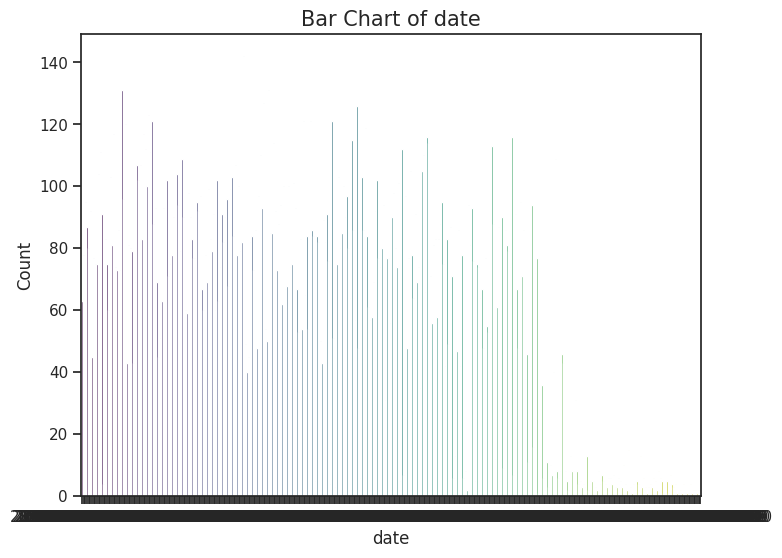

In [15]:
# Membuat bar chart untuk setiap fitur kategorikal
for feature in categorical_features: # Melakukan perulangan sebanyak categorical features dan disimpan dalam varibel feature
  plt.figure(figsize=(8, 6)) # Memplotkan figure dengan ukuran lebar 8 inci dan tinggi 6 inci
  sns.countplot(x=feature, data=df, palette='viridis') #  Bar plot yang dikategorikan berdasarkan fitur dari dataset dengan warna yang beragam
  plt.title(f'Bar Chart of {feature}', size=15) # Menulis judul sesuai nama fitur dengan ukuran teks 15
  plt.xlabel(feature, size=12) # Menulis label 'x' (yang di bawah) sesuai nama fitur dengan ukuran teks 12
  plt.ylabel('Count', size=12) # Menulis label 'y' (yang di kiri) dengan nama Count dengan ukuran teks 12
  plt.show() # Tampilkan figure

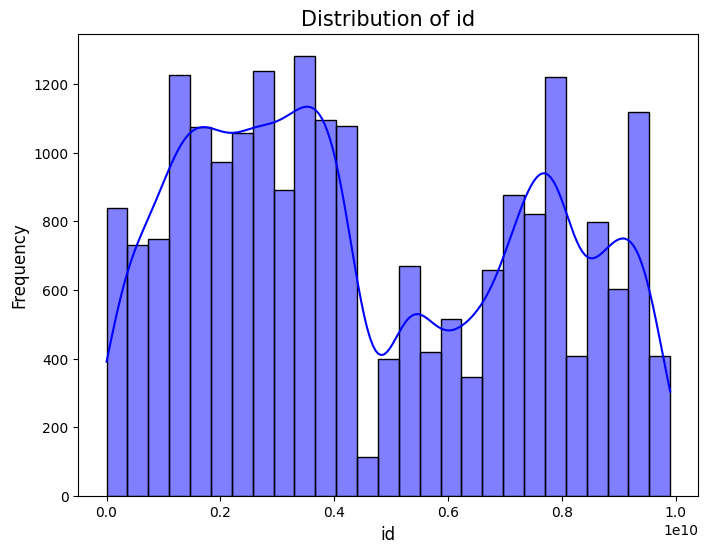

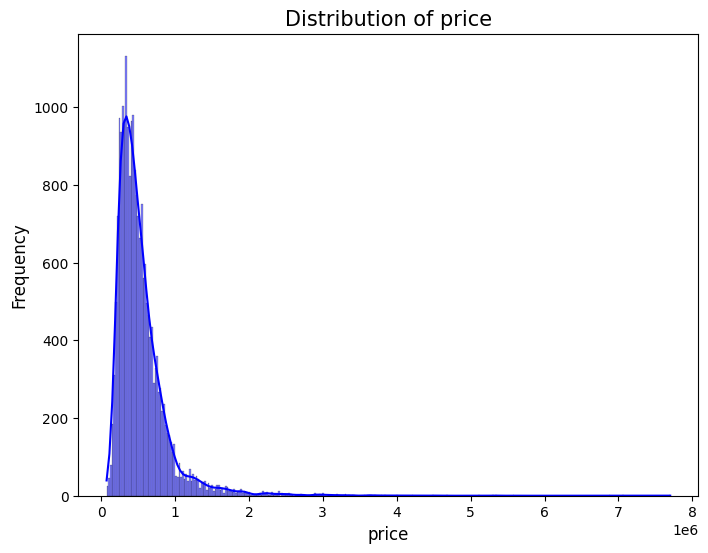

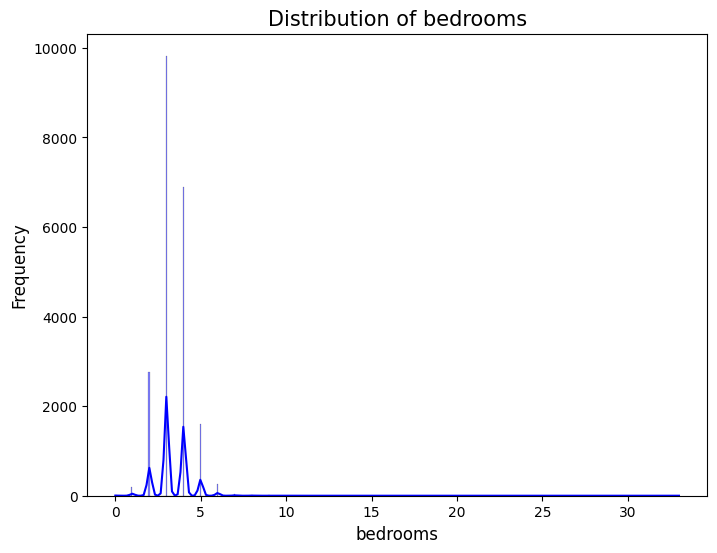

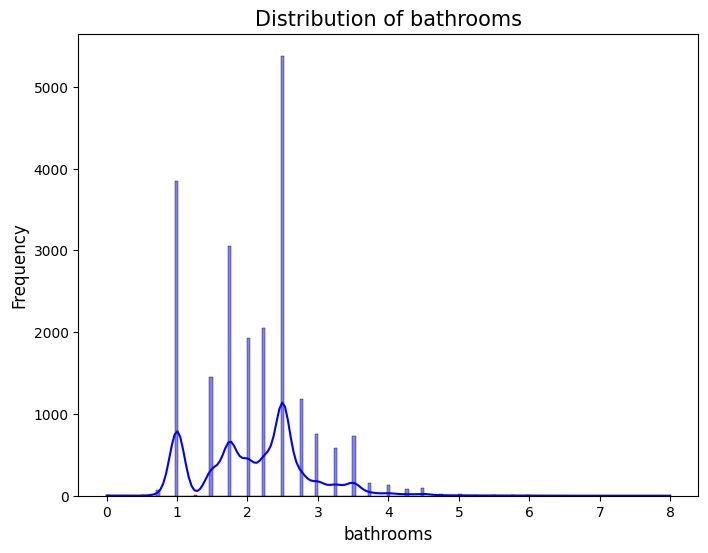

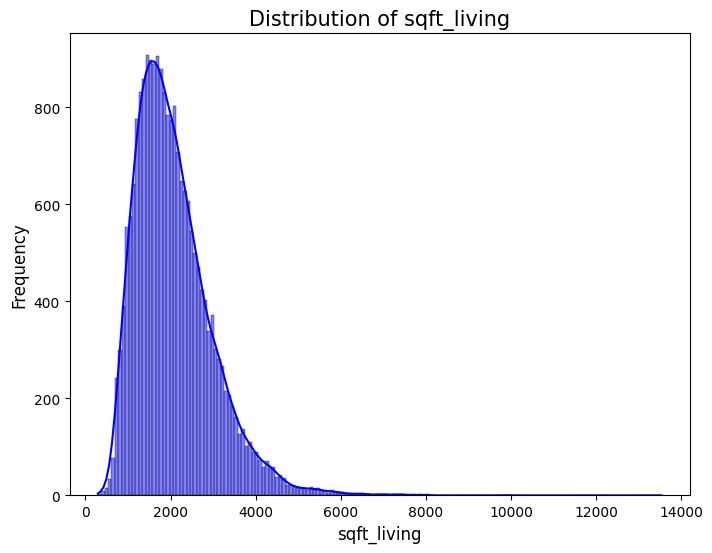

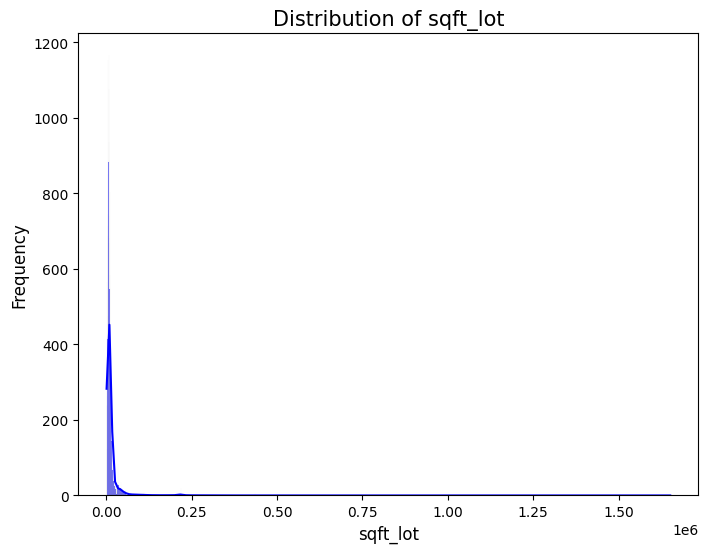

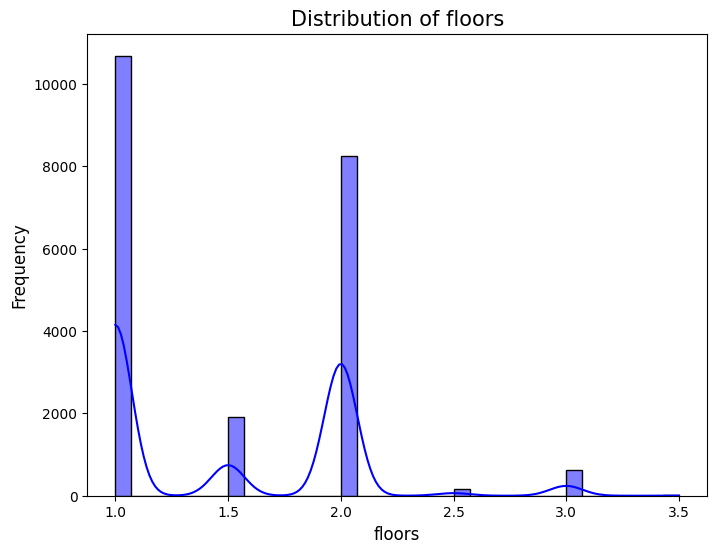

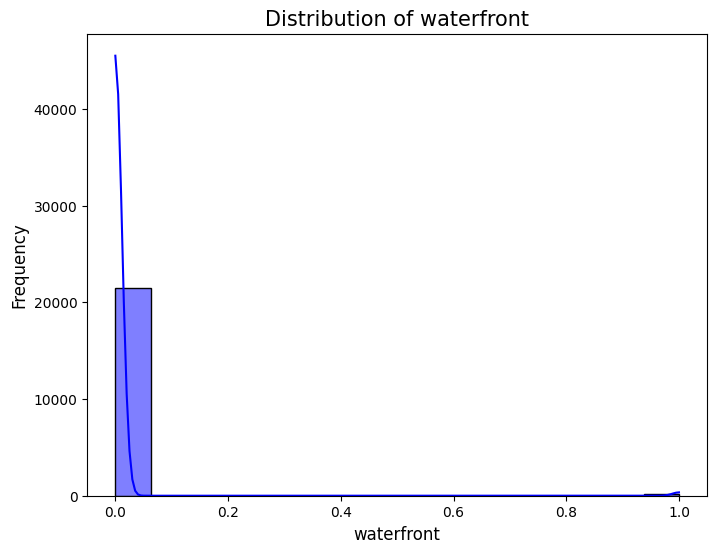

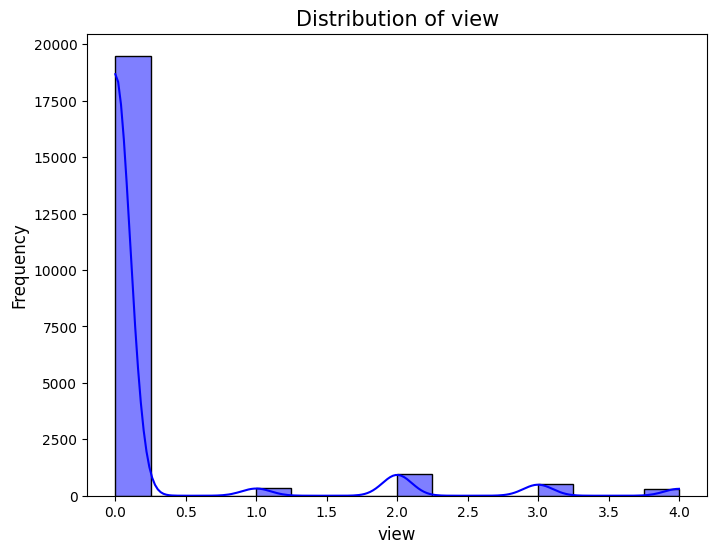

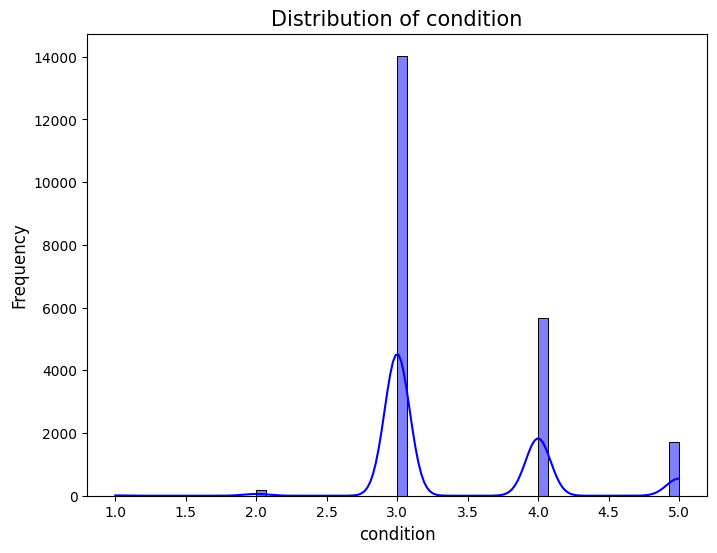

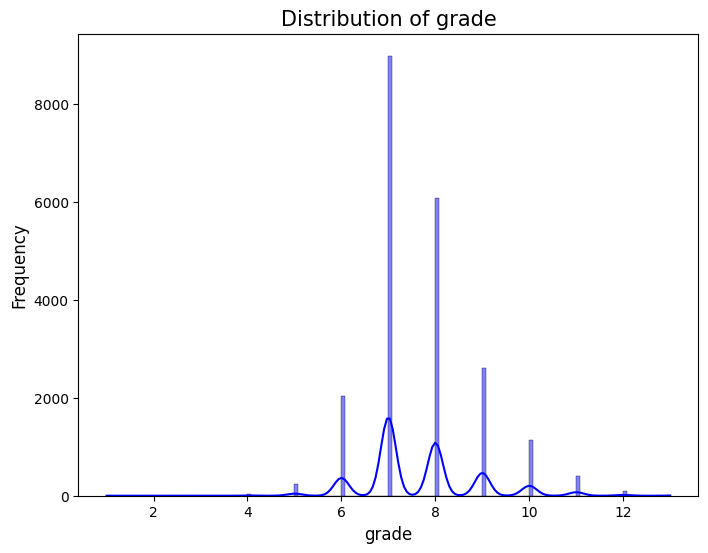

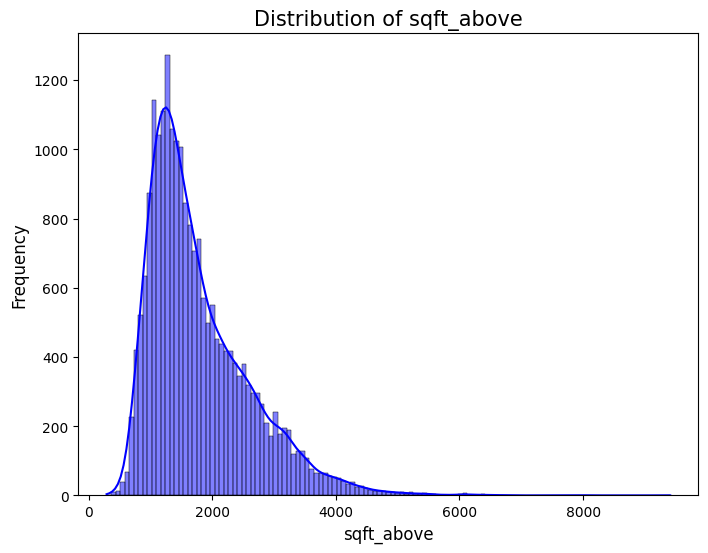

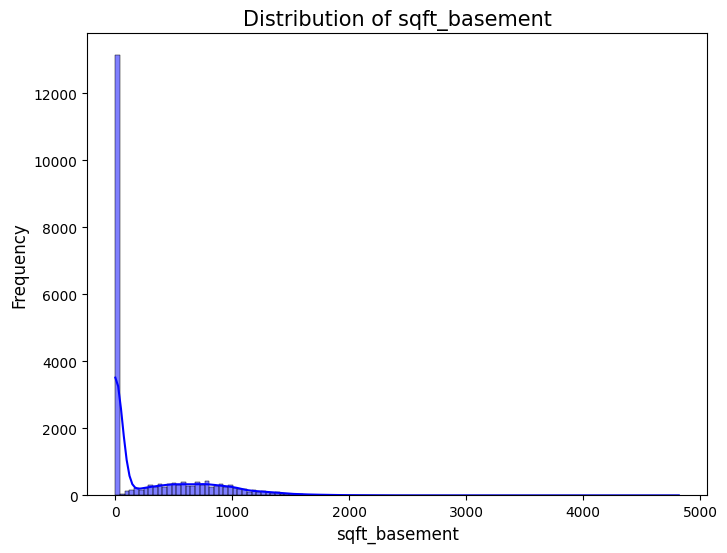

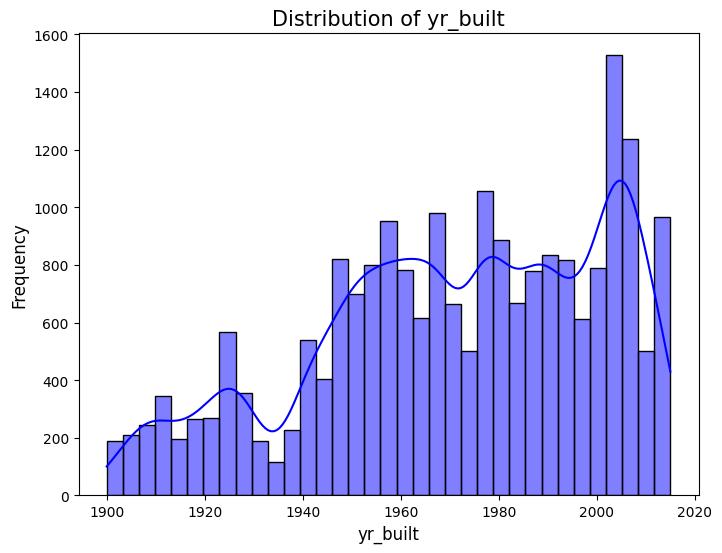

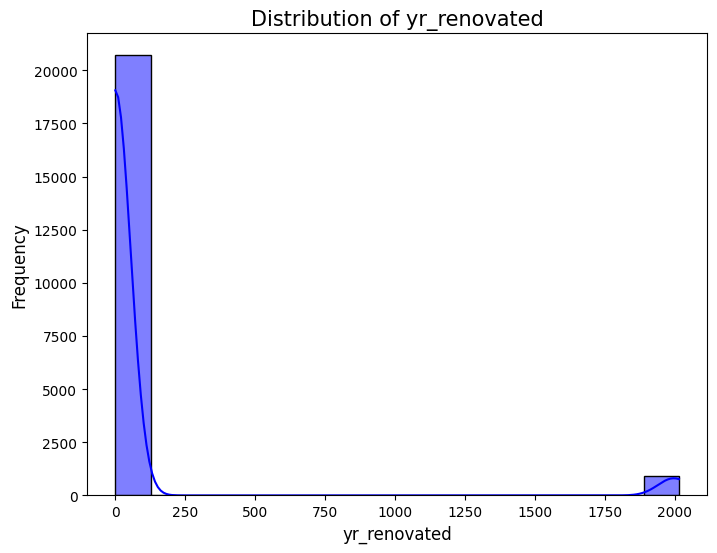

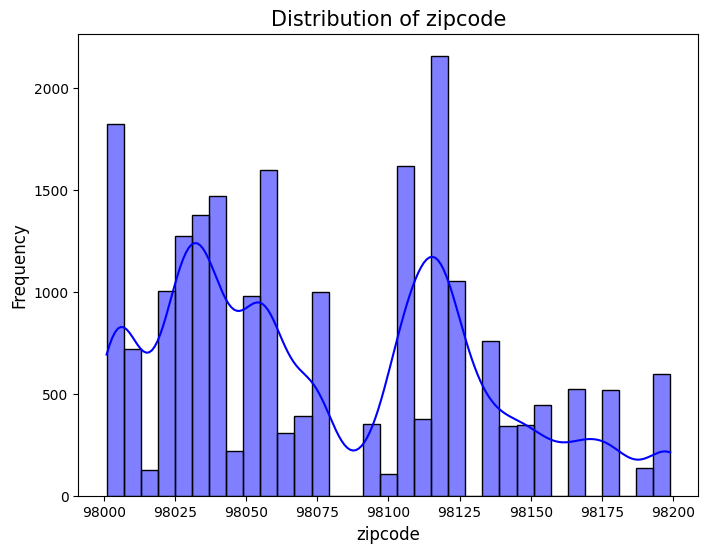

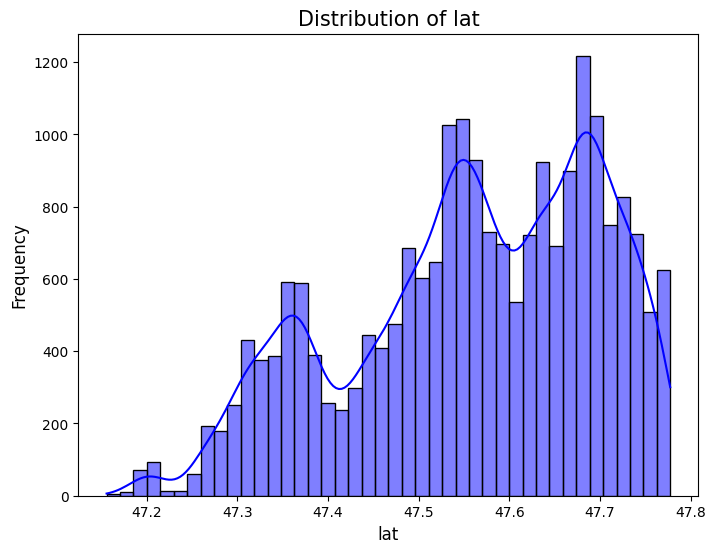

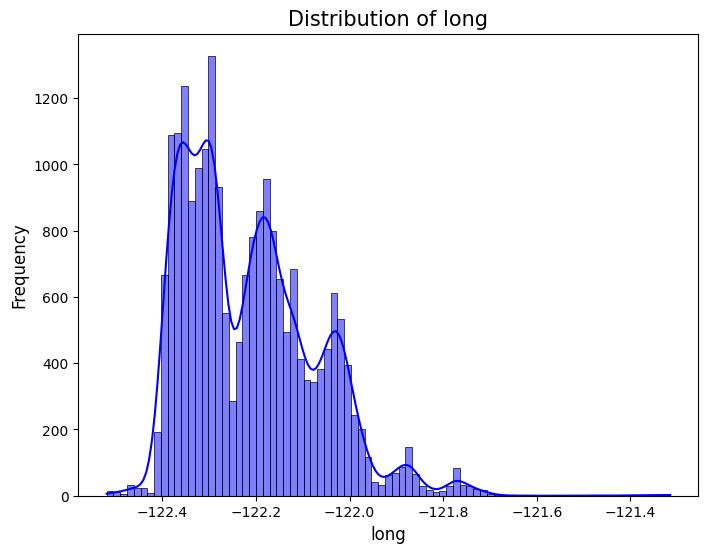

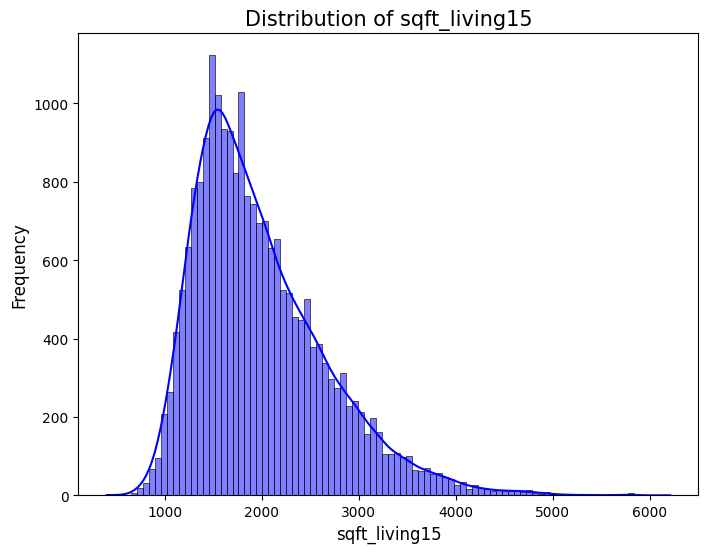

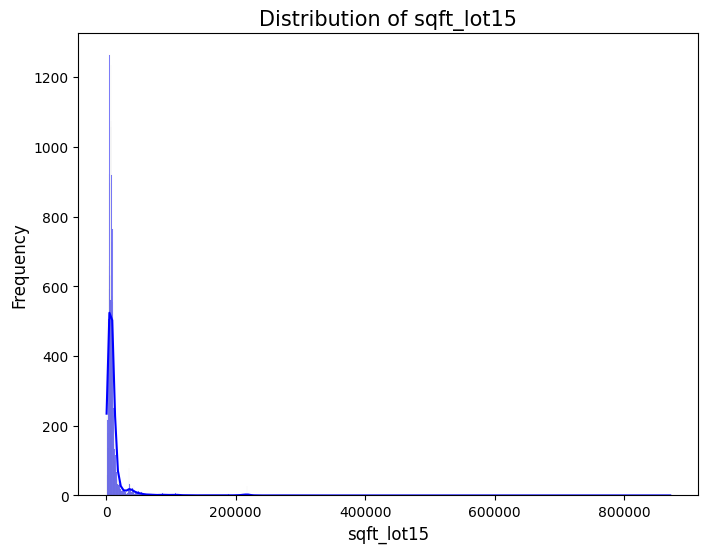

In [ ]:
# Membuat distribusi untuk setiap fitur numerik
for feature in numerical_features: # Melakukan perulangan sebanyak numerical features dan disimpan dalam varibel feature
    plt.figure(figsize=(8, 6)) # Memplotkan figure dengan ukuran lebar 8 inci dan tinggi 6 inci
    sns.histplot(df[feature], kde=True, color='blue') # Plot distribusi yang dikategorikan berdasarkan fitur dari dataset dengan warna darkcyan
    plt.title(f'Distribution of {feature}', size=15) # Menulis judul sesuai nama fitur dengan ukuran teks 15
    plt.xlabel(feature, size=12) # Menulis label 'x' (yang di bawah) sesuai nama fitur dengan ukuran teks 12
    plt.ylabel('Frequency', size=12) # Menulis label 'y' (yang di kiri) dengan nama Frequency dengan ukuran teks 12
    plt.show() # Tampilkan figure

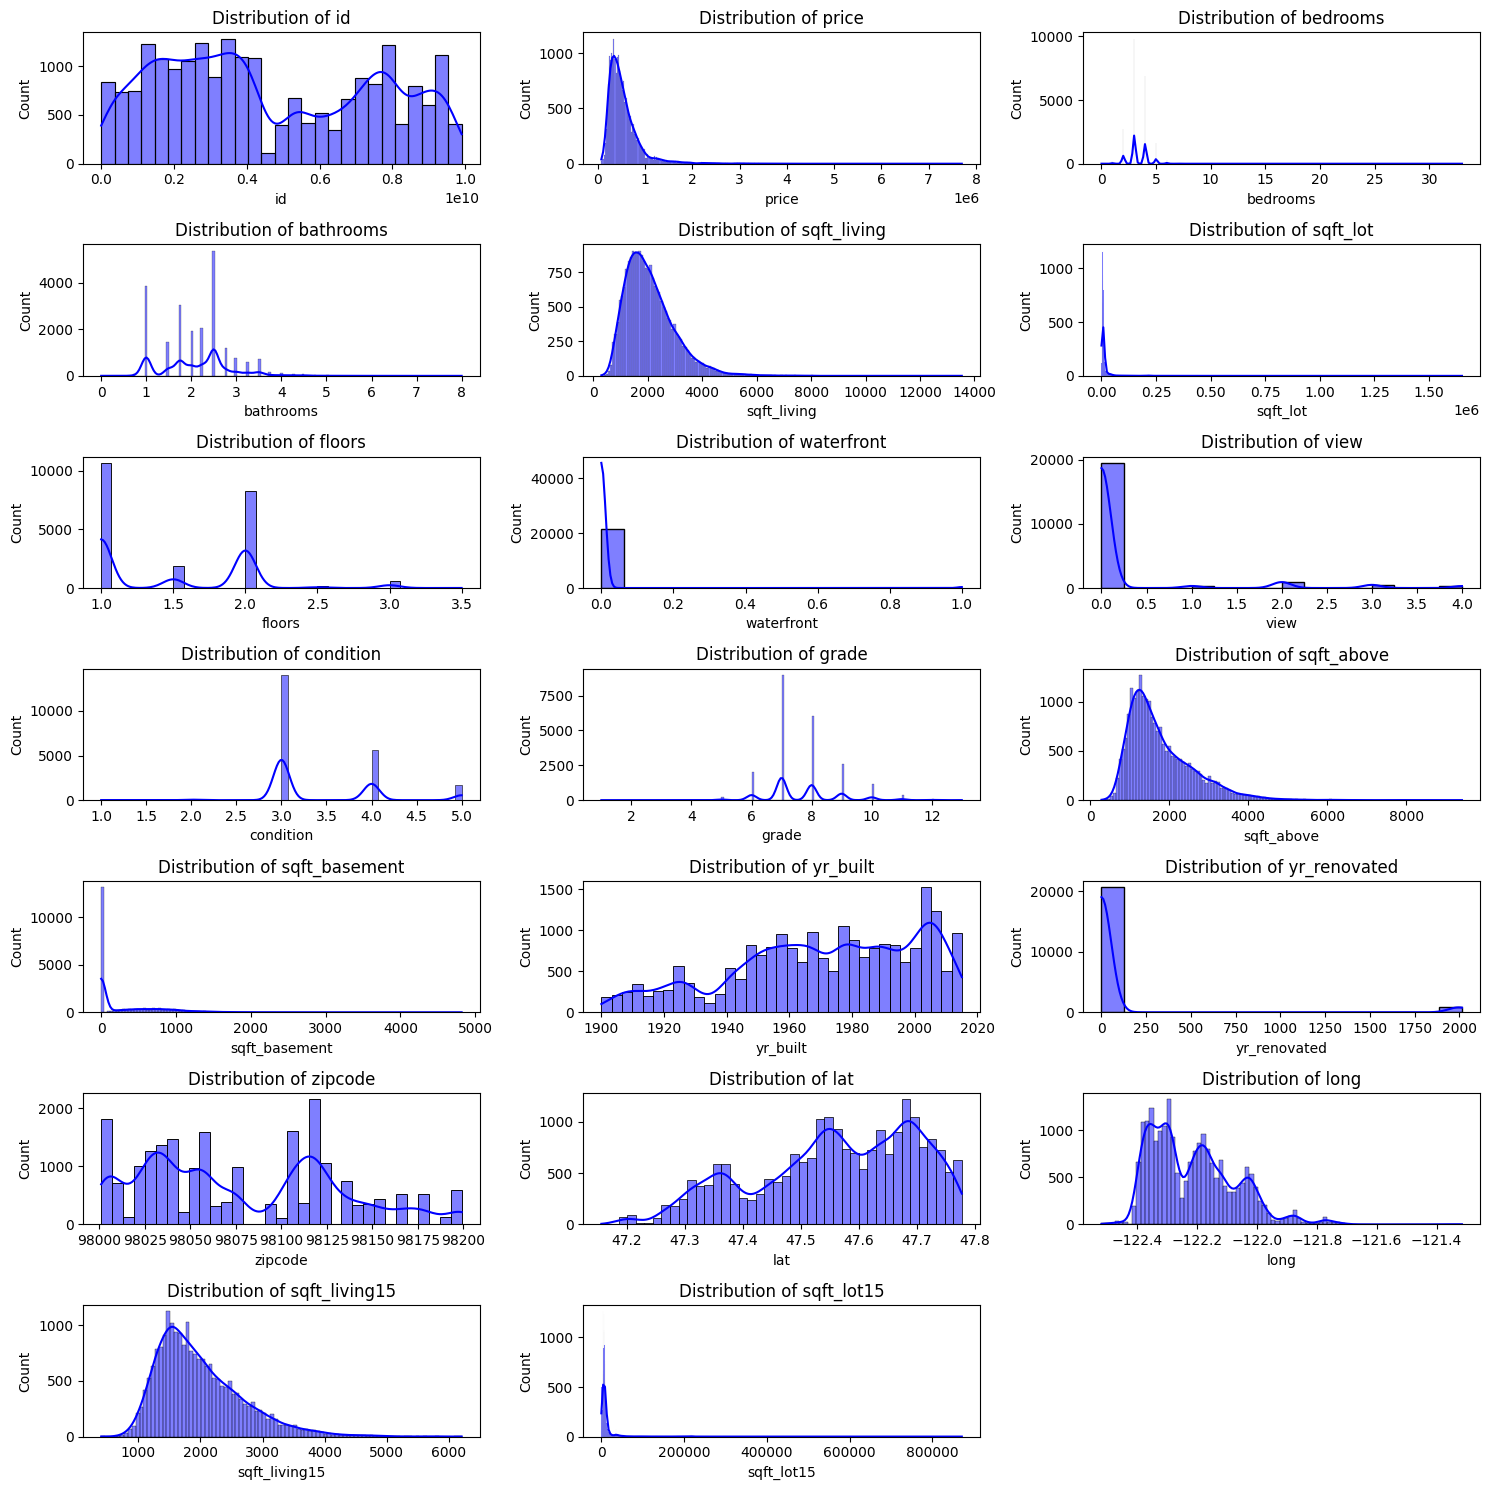

In [ ]:
plt.figure(figsize=(15, 15)) # Membuat distribution plot untuk setiap fitur numerik dengan ukuran lebar 15 inci dan tinggi 15 inci

# Membuat distribution plot untuk setiap fitur numerikal
for i, feature in enumerate(numerical_features): # Melakukan perulangan sebanyak numerical features dan disimpan dalam varibel feature
    plt.subplot(7, 3, i + 1) # Membuat subplot dalam tata letak 7x3 dan i + 1 yang artinya hanya akan memplot sesuai dengan jumlah fitur meskipun kolom tersebut lebih
    sns.histplot(df[feature], kde=True, color='blue') # Distribution plot yang dikategorikan berdasarkan fitur dari dataset dengan warna blue
    plt.title(f'Distribution of {feature}', size=12) # Menulis judul sesuai nama fitur dengan ukuran teks 12
    plt.xlabel(feature, size=10) # Menulis label 'x' (yang di bawah) sesuai nama fitur dengan ukuran teks 10

plt.tight_layout() # Menyesuaikan tata letak
plt.show() # Tampilkan figure

In [ ]:
# Fungsi untuk memplot distribusi dengan bin width interaktif
def plot_distribution(feature, bin_width): # Fungsi untuk menampilkan distribusi dengan interaktif bin width
    plt.figure(figsize=(8, 6)) # Memplotkan figure dengan ukuran lebar 8 inci dan tinggi 6 inci
    sns.histplot(df[feature], bins=bin_width, kde=True, color='cyan') # Distribution plot yang dikategorikan berdasarkan fitur dari dataset dengan warna cyan
    plt.title(f'Distribusi {feature} (Bin Width: {bin_width})', size=15) # Menulis judul sesuai nama fitur dengan ukuran teks 15
    plt.xlabel(feature, size=12) # Menulis label 'x' (yang di bawah) sesuai nama fitur dengan ukuran teks 12
    plt.ylabel('Frequency', size=12) # Menulis label 'y' (yang di kiri) dengan nama Frequency dengan ukuran teks 12
    plt.show() # Tampilkan figure

interact(plot_distribution, feature=features, bin_width=IntSlider(min=1, max=50, step=1, value=10)) # Interaksi untuk memilih fitur dan bin width

interactive(children=(Dropdown(description='feature', options=('id', 'date', 'price', 'bedrooms', 'bathrooms',…

<function __main__.plot_distribution(feature, bin_width)>

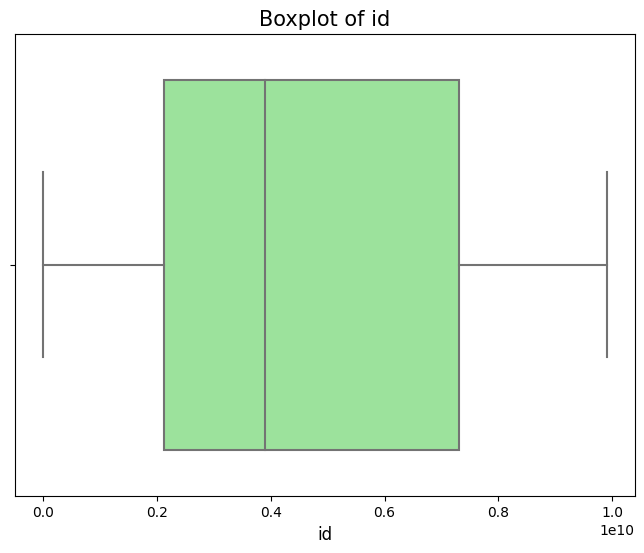

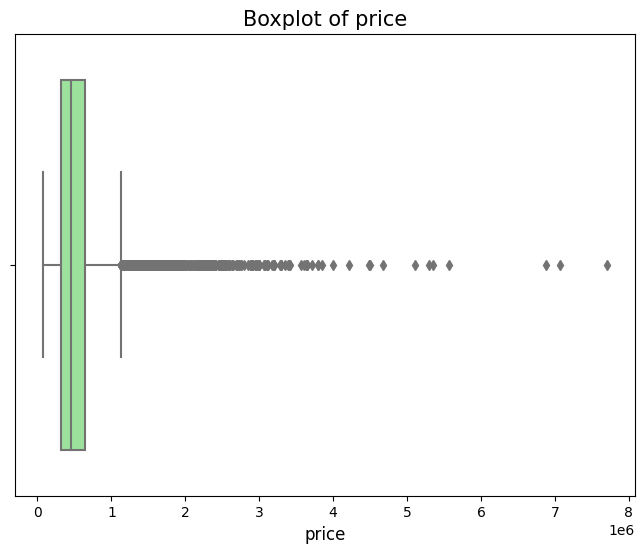

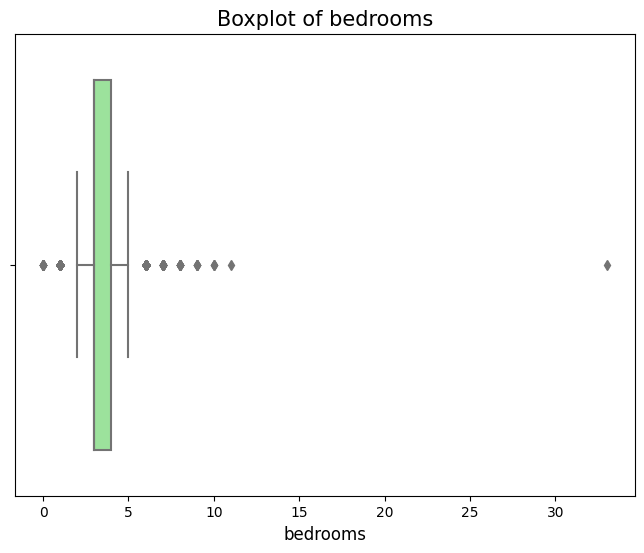

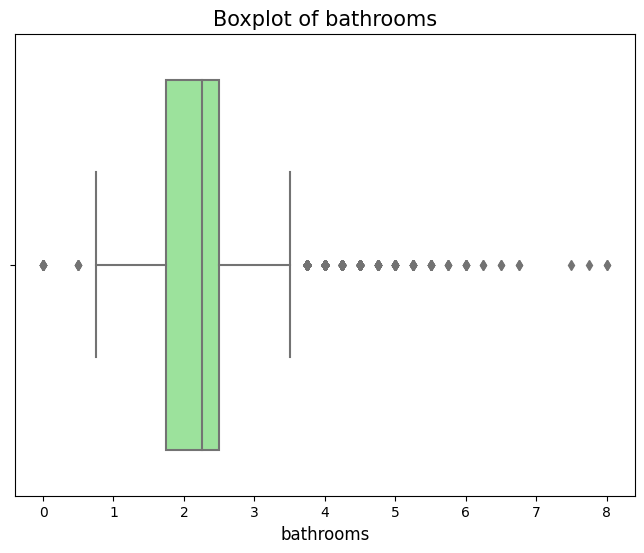

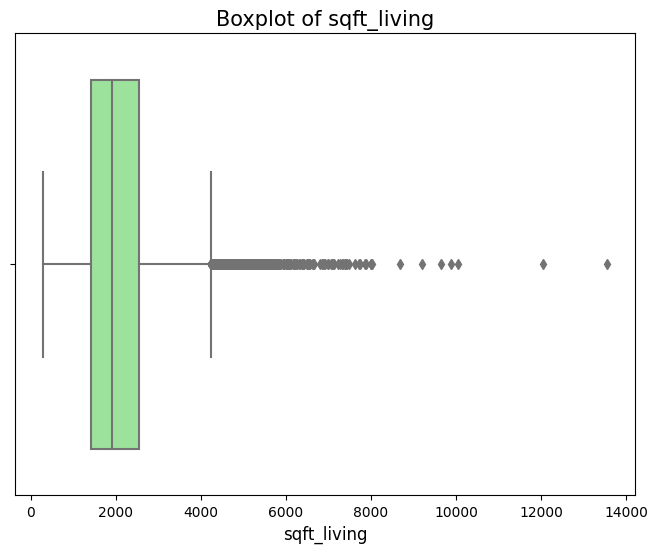

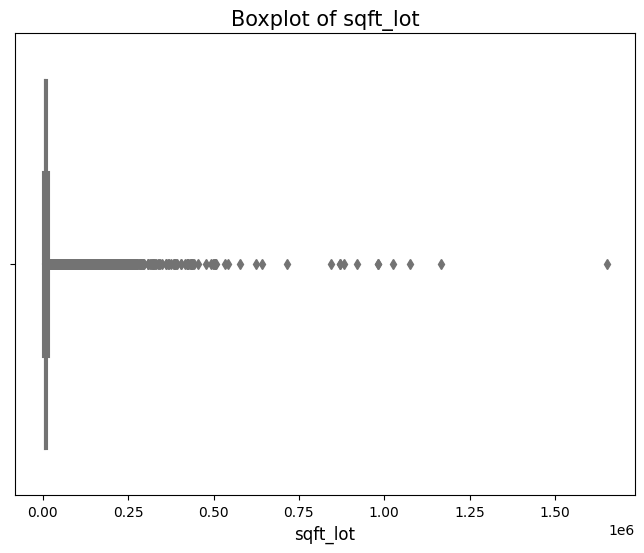

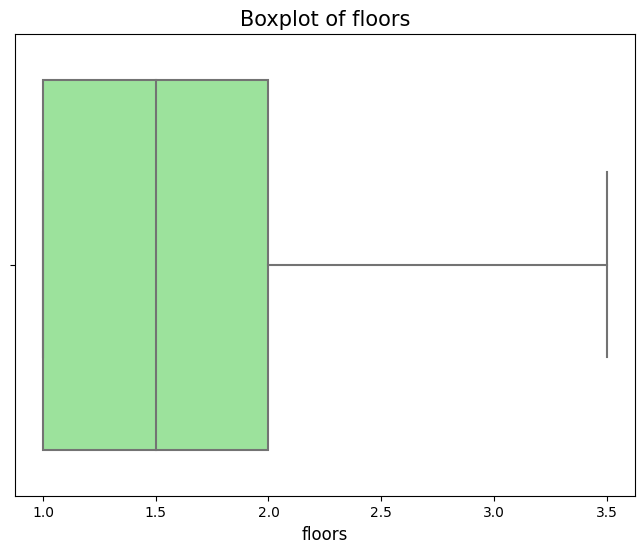

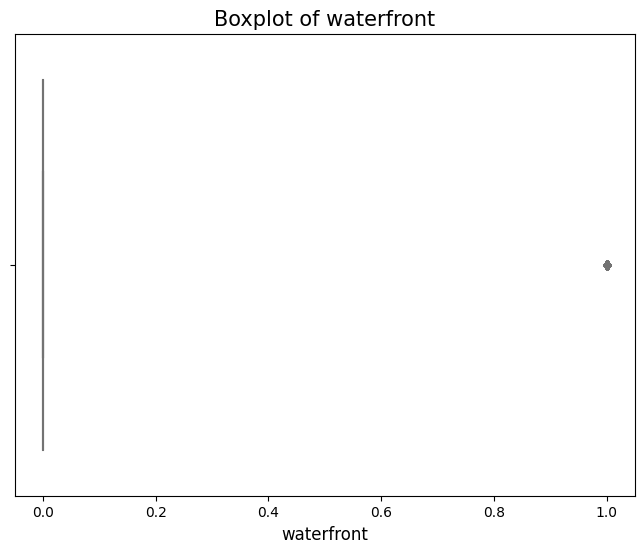

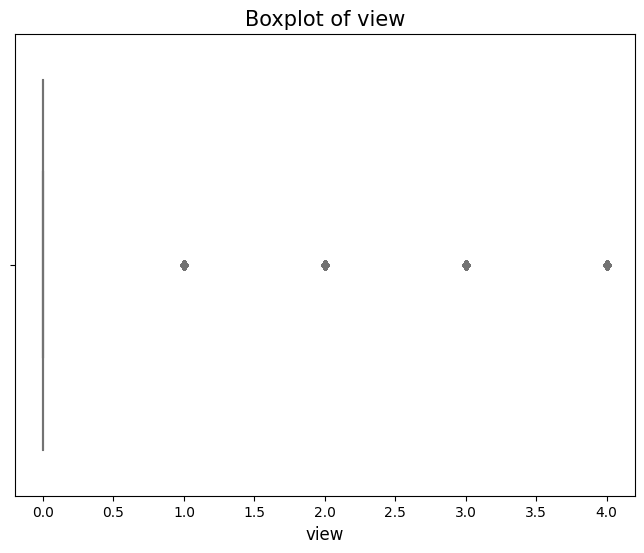

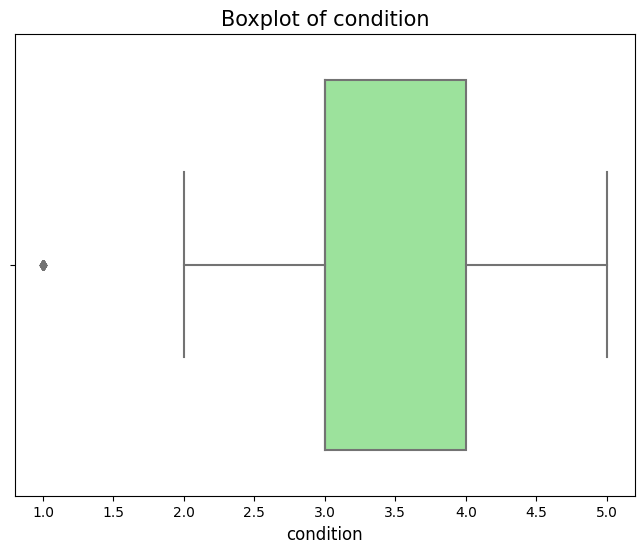

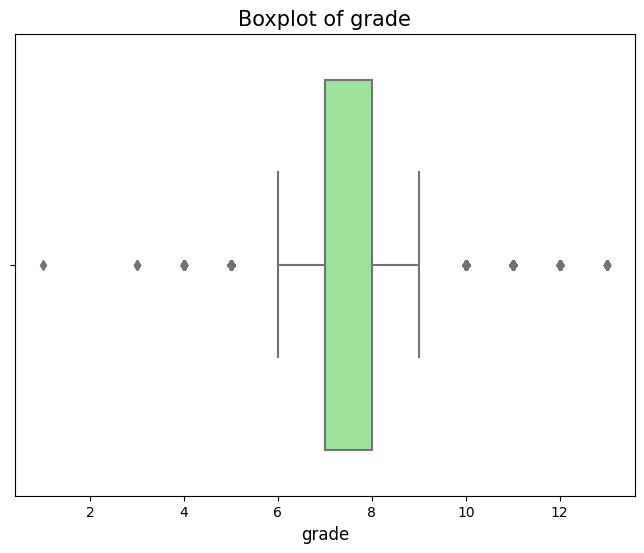

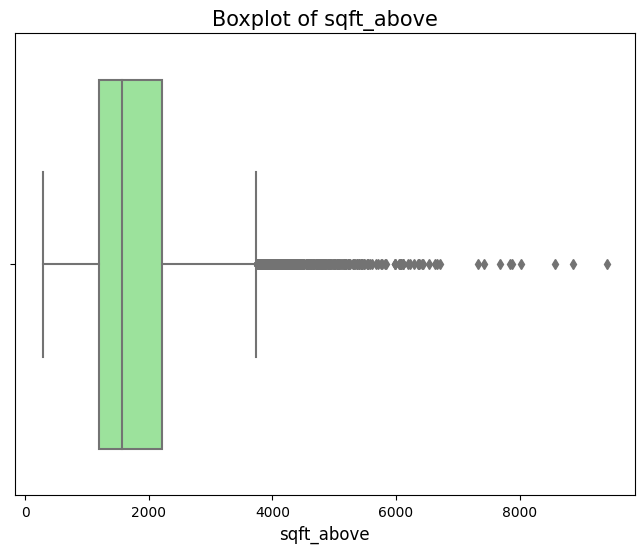

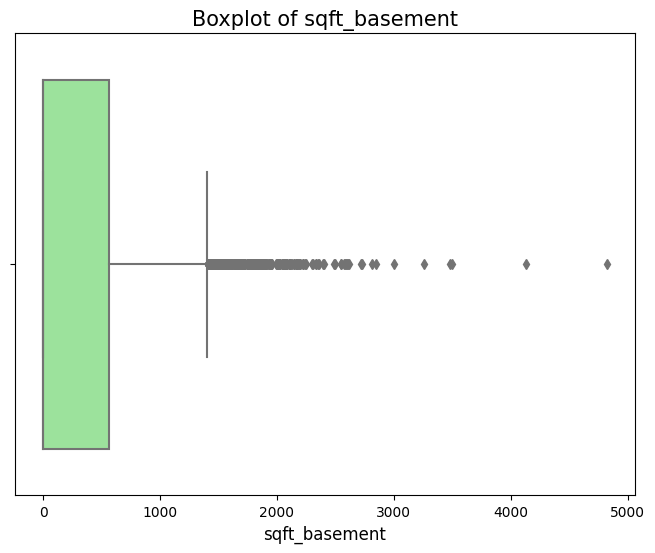

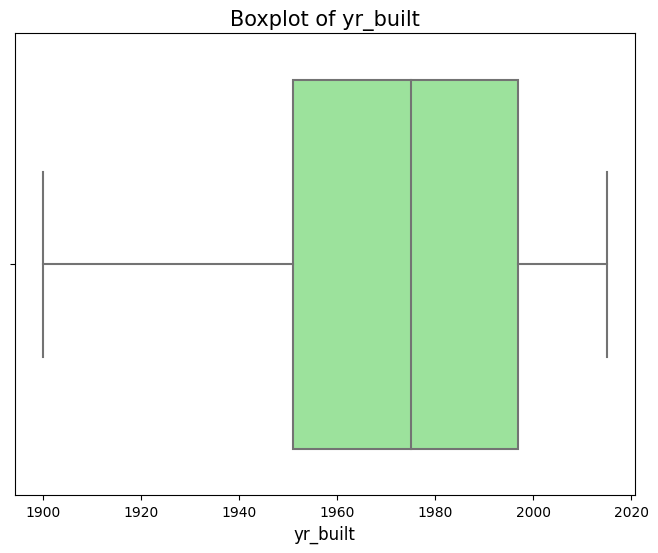

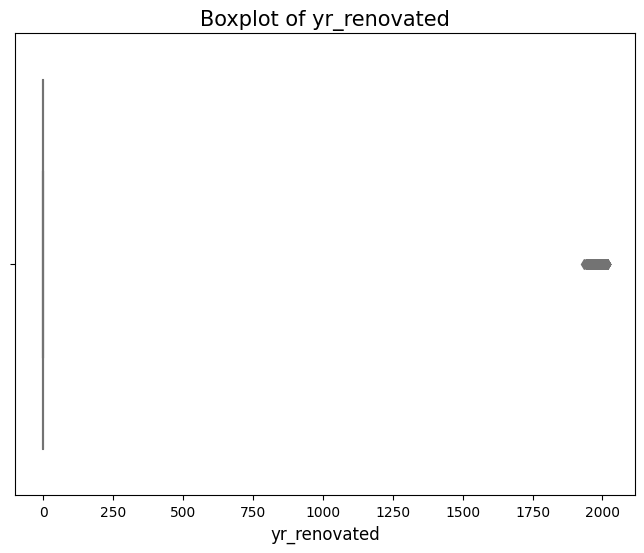

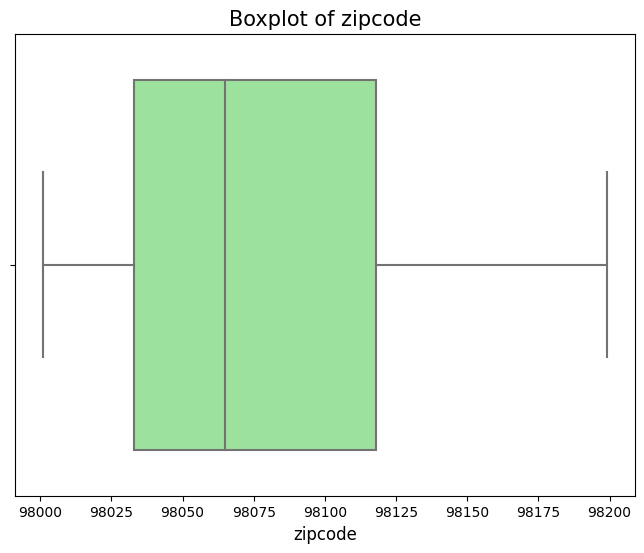

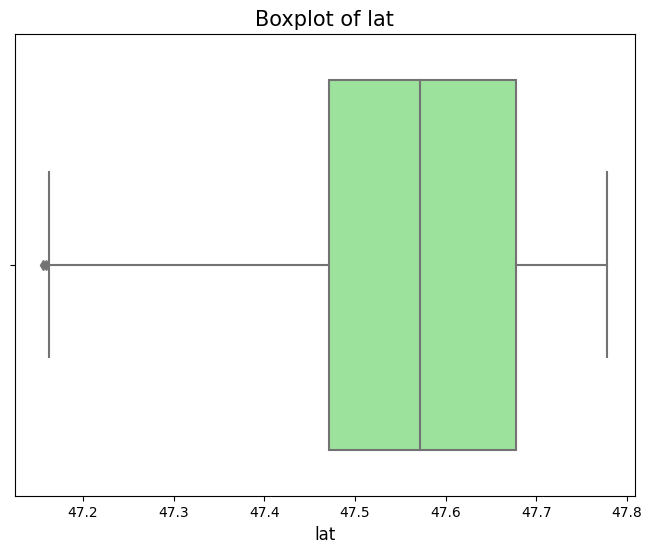

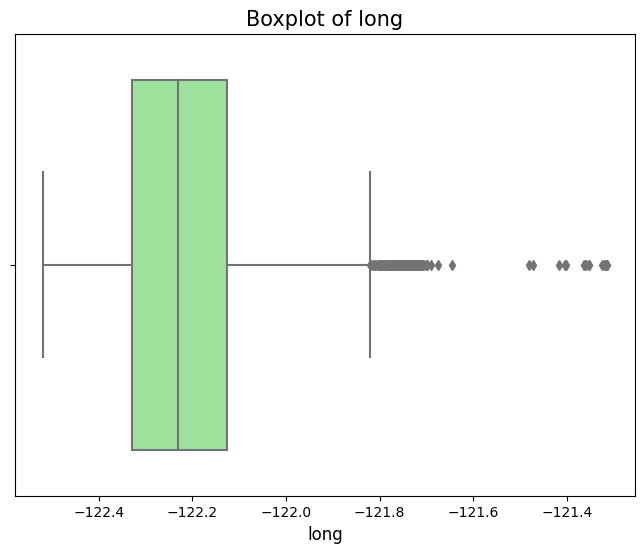

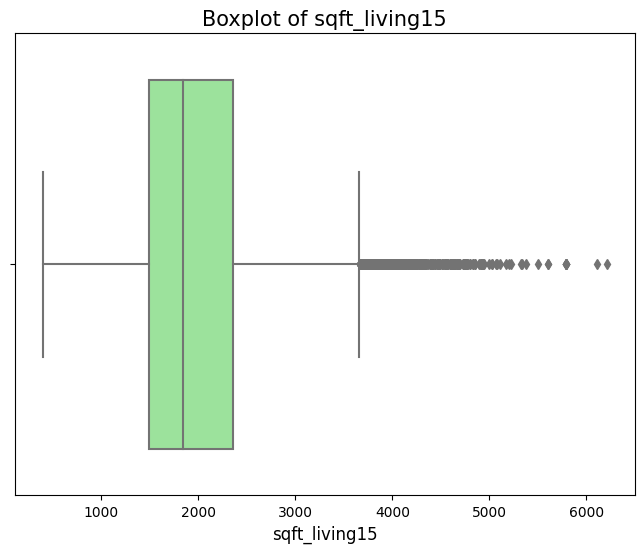

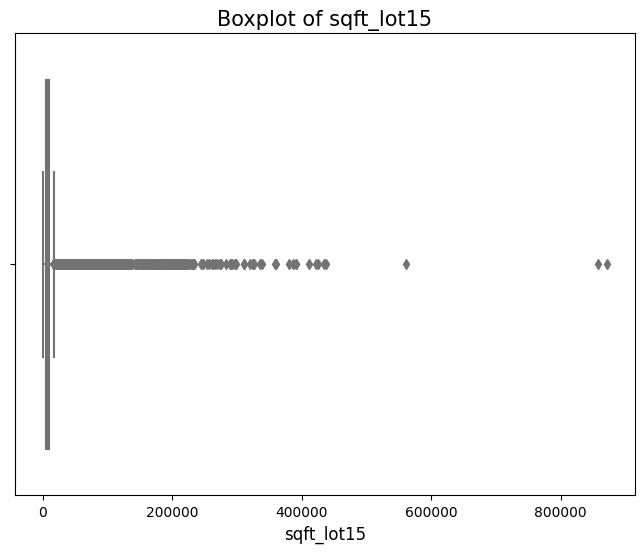

In [ ]:
# Visualisasi boxplot untuk setiap fitur yang numerikal
for feature in numerical_features: # Melakukan perulangan sebanyak numerical features dan disimpan dalam varibel feature
    plt.figure(figsize=(8, 6)) # Memplotkan figure dengan ukuran lebar 8 inci dan tinggi 6 inci
    sns.boxplot(x=df[feature], color='lightgreen') # Boxplot yang dikategorikan berdasarkan numerical fitur dengan warna lightgreen
    plt.title(f'Boxplot of {feature}', size=15) # Menulis judul sesuai nama fitur dengan ukuran teks 15
    plt.xlabel(feature, size=12) # Menulis label 'x' (yang di bawah) sesuai nama fitur dengan ukuran teks 12
    plt.show() # Tampilkan figure

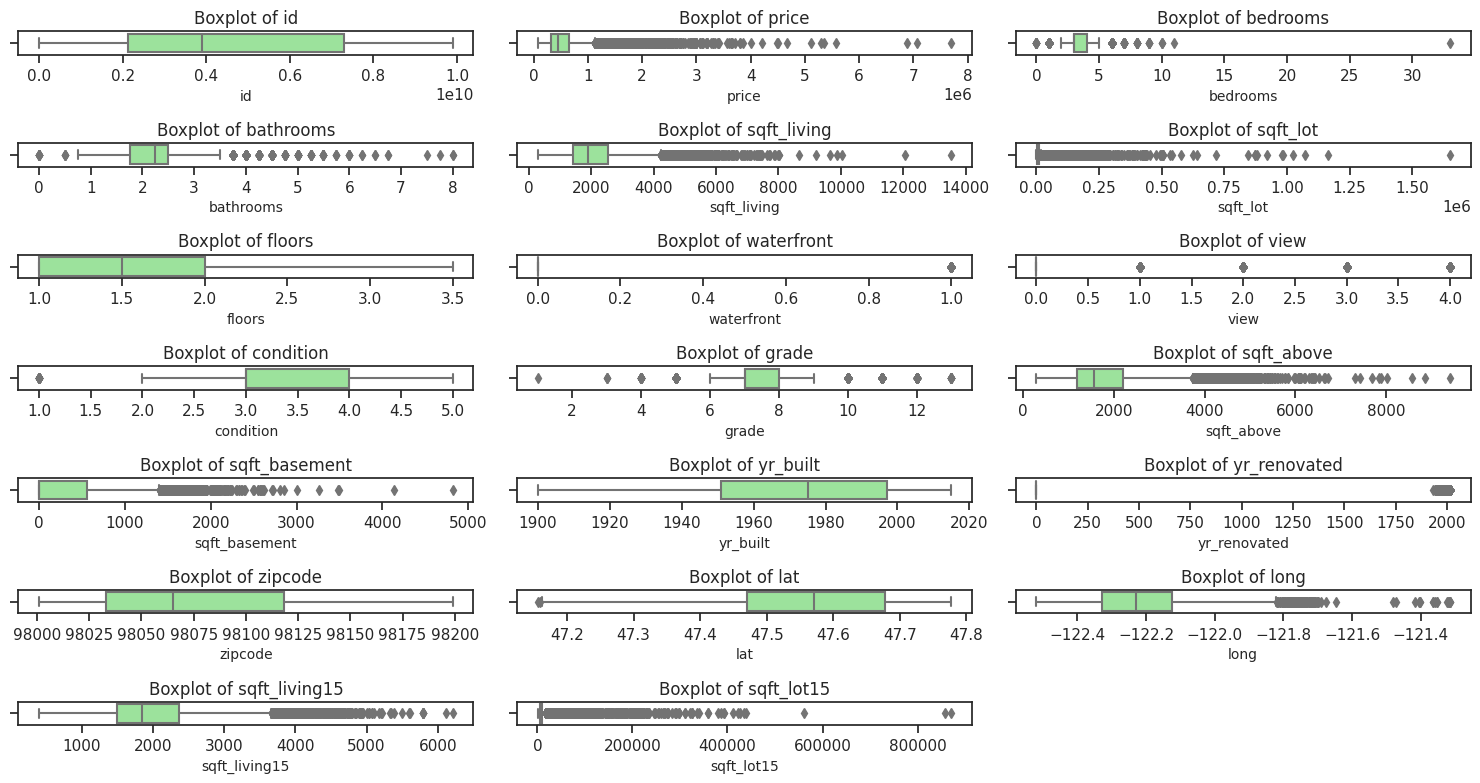

In [16]:
plt.figure(figsize=(15, 8)) # Memplotkan figure dengan ukuran lebar 15 inci dan tinggi 8 inci

# Membuat boxplot untuk setiap fitur numerikal
for i, feature in enumerate(numerical_features): # Melakukan perulangan sebanyak numerical features dan disimpan dalam varibel feature
    plt.subplot(7, 3, i + 1) # Membuat subplot dalam tata letak 7x3 dan i + 1 yang artinya hanya akan memplot sesuai dengan jumlah fitur meskipun kolom tersebut lebih
    sns.boxplot(x=df[feature], orient='h', color='lightgreen') # Boxplot yang dikategorikan berdasarkan numerical_features dengan warna lightgreen
    plt.title(f'Boxplot of {feature}', size=12) # Menulis judul sesuai nama fitur dengan ukuran teks 12
    plt.xlabel(feature, size=10) # Menulis label 'x' (yang di bawah) sesuai nama fitur dengan ukuran teks 10

plt.tight_layout() # Menyesuaikan tata letak
plt.show() # Tampilkan figure


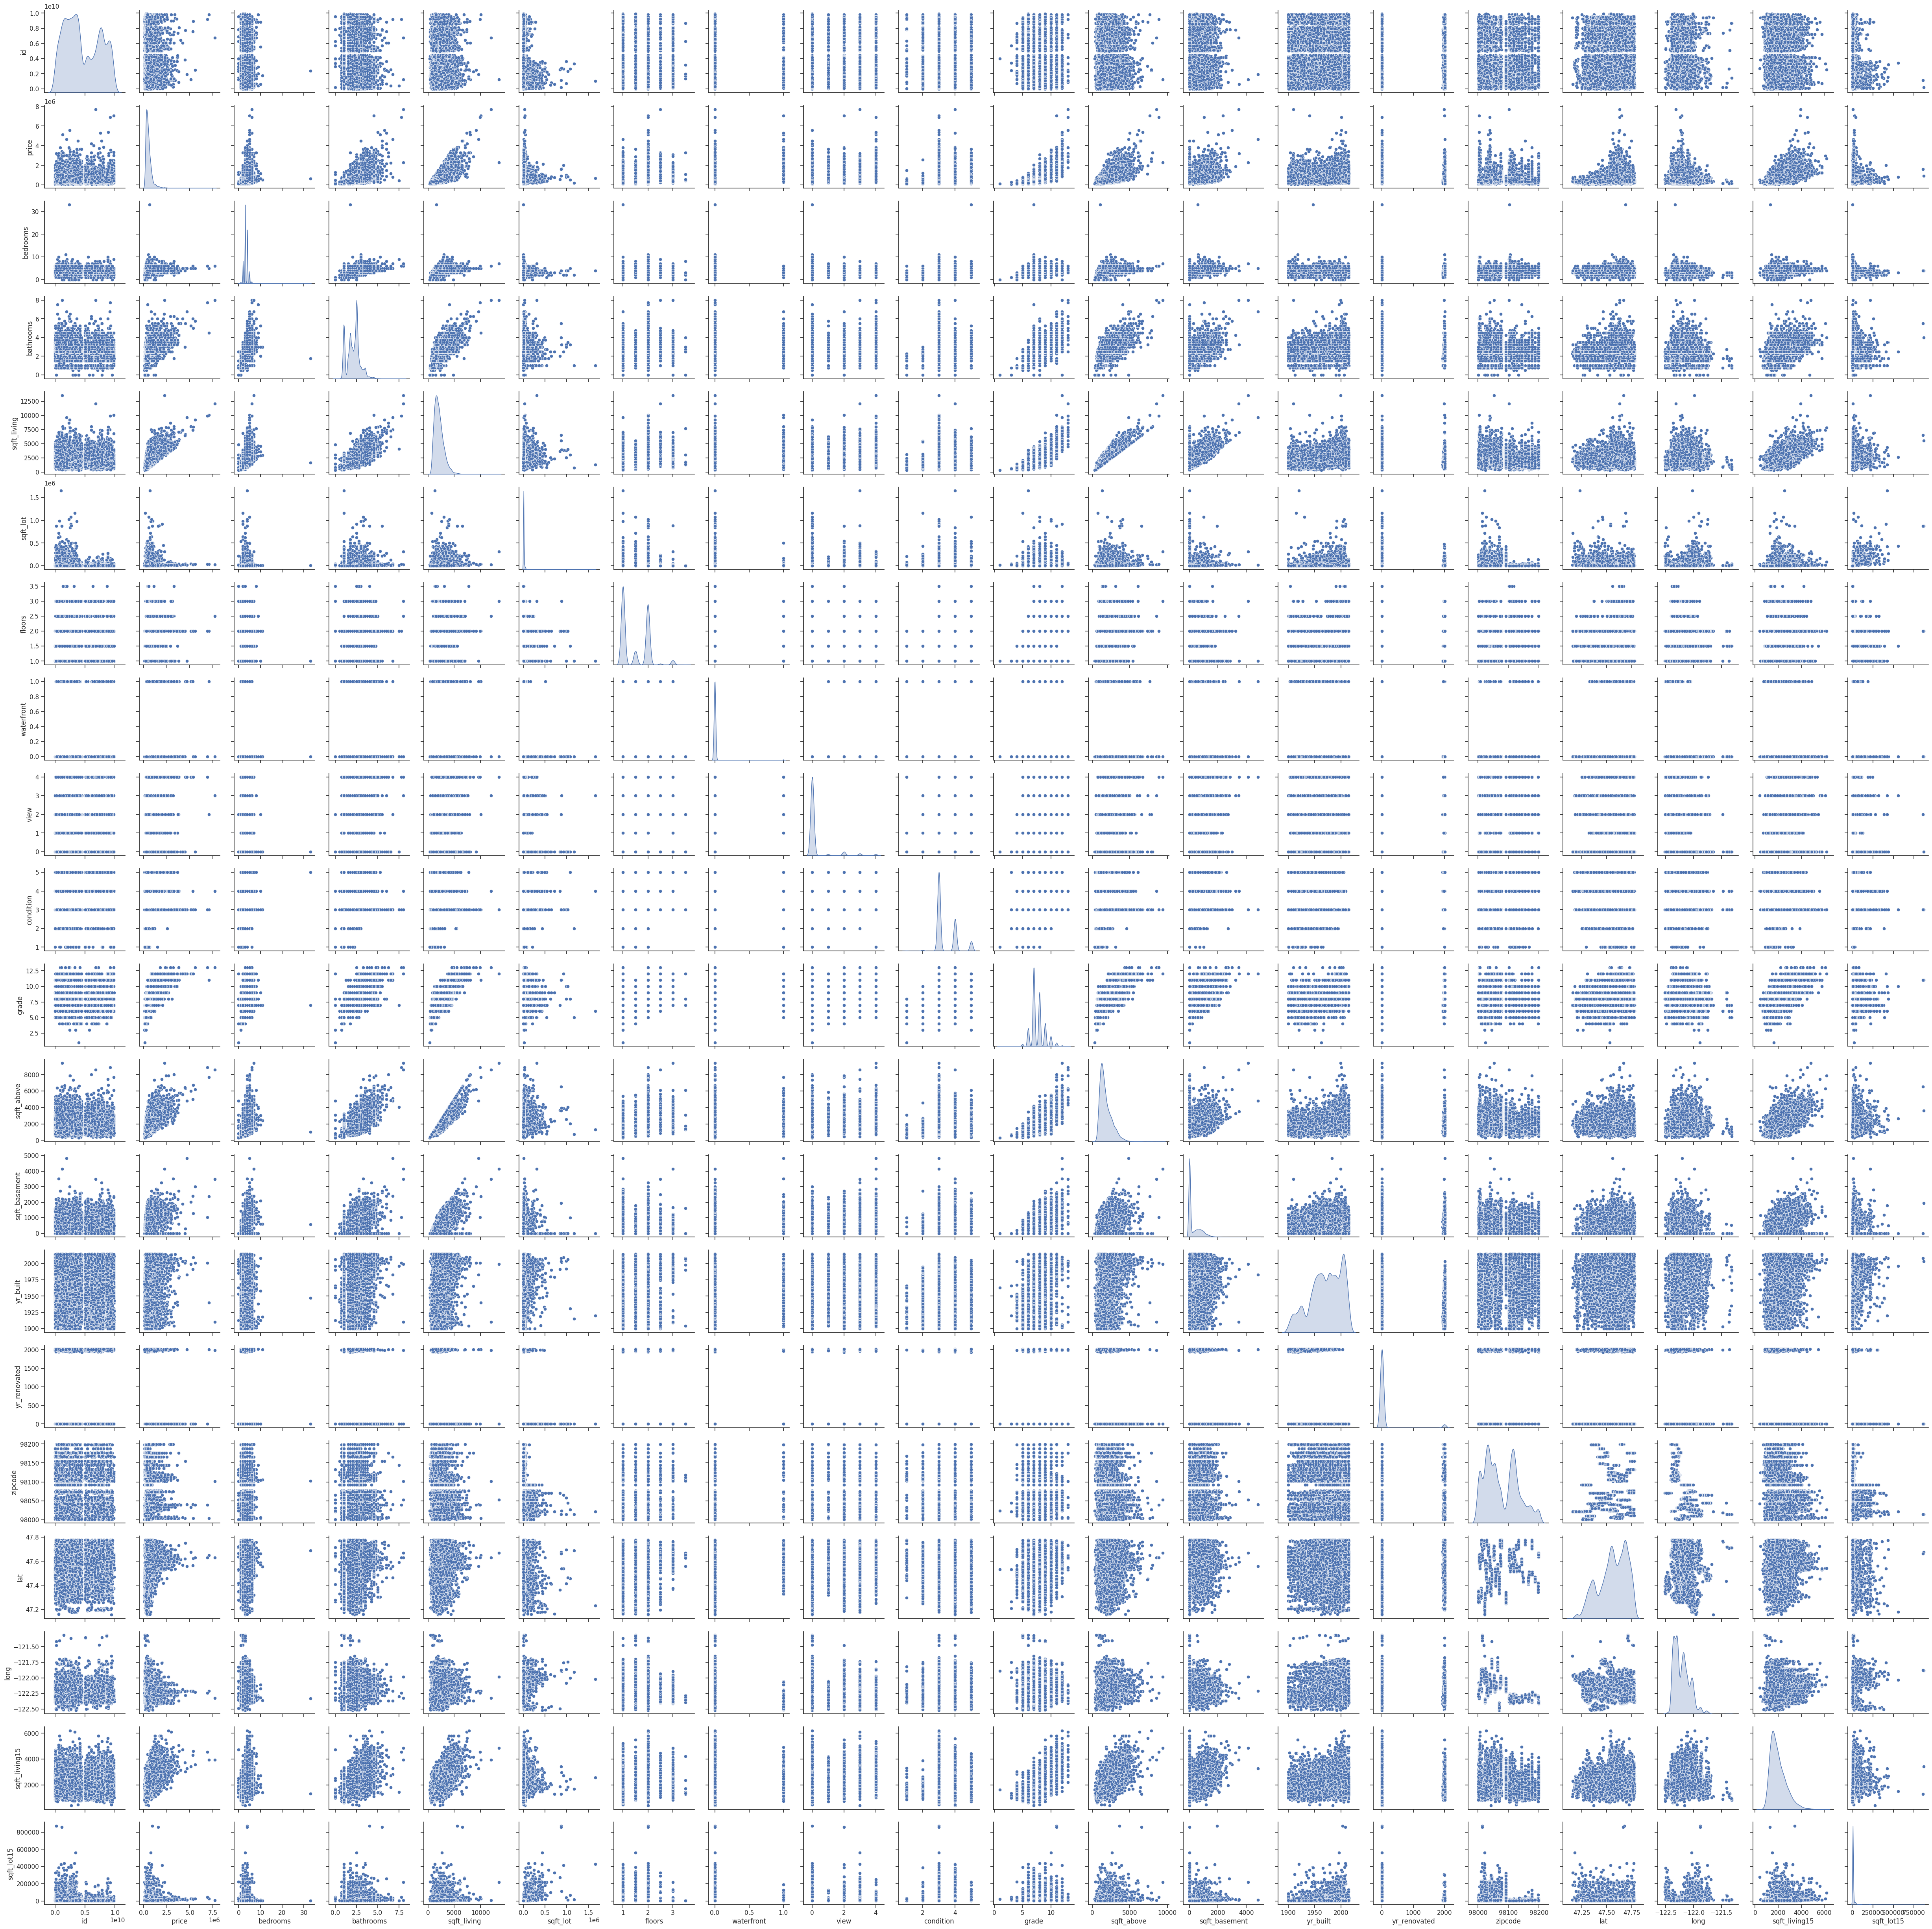

In [ ]:
# Membuat pair plot untuk semua fitur
sns.set(style="ticks") # Style visualisasi
sns.pairplot(df, kind="scatter", diag_kind="kde") # Pair plot semua fitur dengan warna yang sudah ditentukan
plt.show() # Tampilkan figure

<ipython-input-13-d38d546217b0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


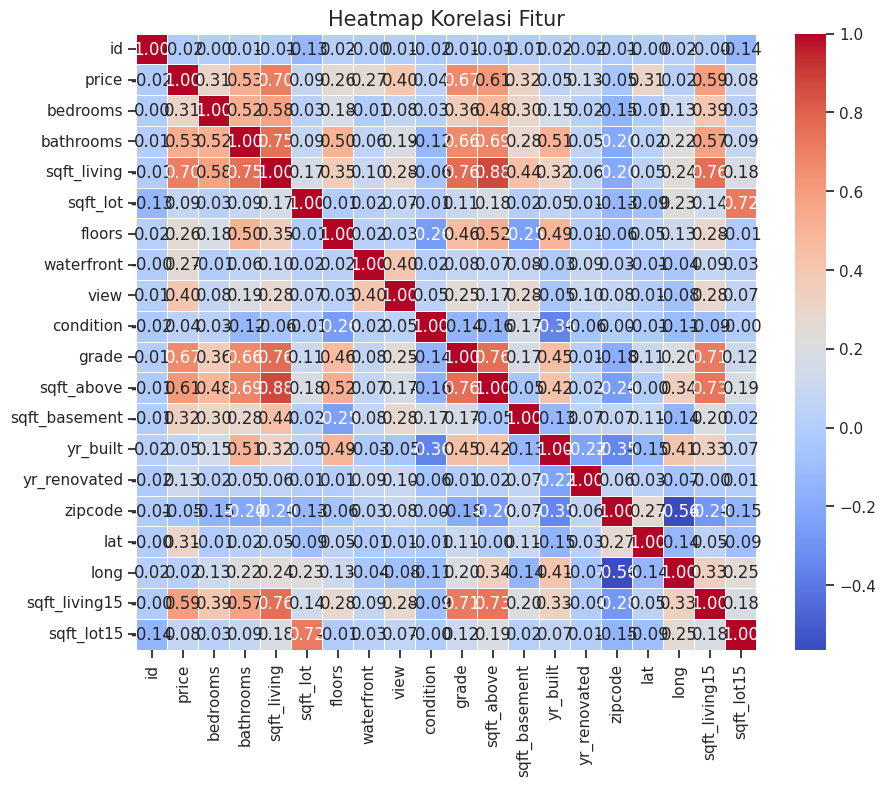

In [ ]:
# Membuat heatmap untuk setiap fitur
plt.figure(figsize=(10, 8)) # Memplotkan figure dengan ukuran lebar 10 inci dan tinggi 8 inci
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # Heatmap semua fitur dengan warna yang sudah ditentukan
plt.title('Heatmap Korelasi Fitur', size=15) # Menulis judul sesuai nama fitur dengan ukuran teks 15
plt.show() # Tampilkan figure

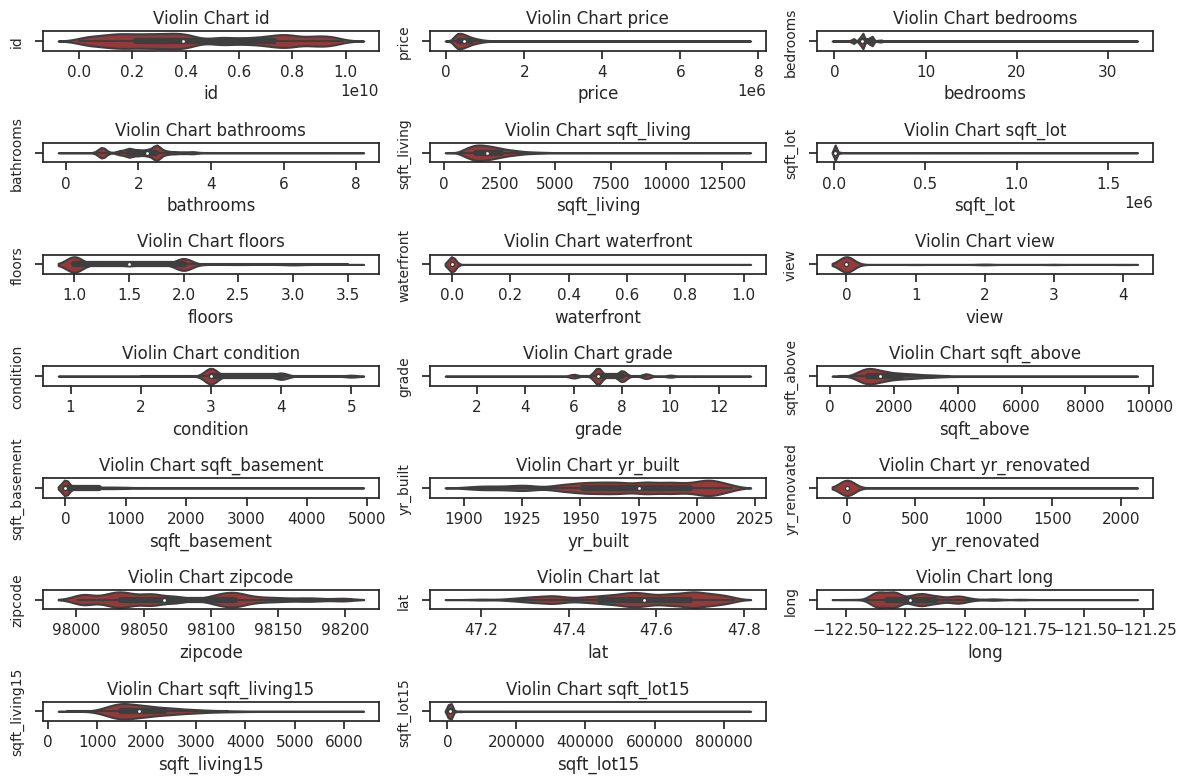

In [ ]:
plt.figure(figsize=(12, 8)) # Memplotkan figure dengan ukuran lebar 12 inci dan tinggi 8 inci

# Membuat violin chart untuk setiap fitur numerikal
for i, feature in enumerate(numerical_features): # Melakukan perulangan sebanyak numerical features dan disimpan dalam varibel feature
  plt.subplot(7, 3, i+1) # Membuat subplot dalam tata letak 7x3 dan i + 1 yang artinya hanya akan memplot sesuai dengan jumlah fitur meskipun kolom tersebut lebih
  sns.violinplot(x=df[feature], color='brown') # Violin chart yang dikategorikan berdasarkan numerical fitur dengan warna brown
  plt.title(f'Violin Chart {feature}', size=12) # Menulis judul sesuai nama fitur dengan ukuran teks 12
  plt.ylabel(feature, size=10) # Menulis label 'y' (yang di kiri) sesuai nama fitur dengan ukuran teks 10


plt.tight_layout() # Menyesuaikan tata letak
plt.show() # Tampilkan figure